In [1]:
from functions import * 

In [2]:
directorySara = './GMM Data/sara/'
directoryRawan = './GMM Data/rawan/'
directorySalah = './GMM Data/salah/'

featuresSara = extractFromFile(directorySara)
featuresRawan = extractFromFile(directoryRawan)
featuresSalah = extractFromFile(directorySalah)

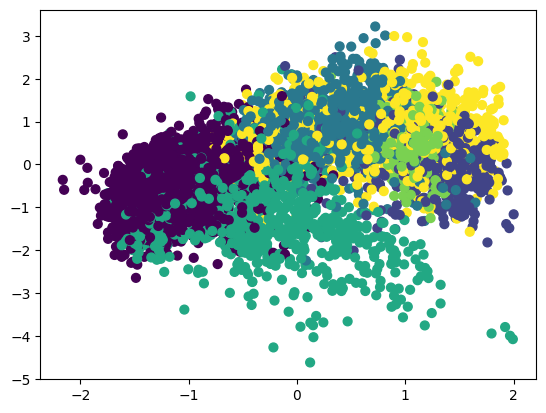

In [3]:
# from sklearn.mixture import GaussianMixture 

sara_gmm, labelsSara = generateModel('sara_gmm', featuresSara,'Sara')
rawan_gmm, labelsRawan = generateModel('rawan_gmm', featuresRawan,'Rawan')
salah_gmm, labelsSalah = generateModel('salah_gmm',featuresSalah,'Salah')

# modelName = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='spherical',n_init =3)
# modelName.fit(featuresSara)
# labels = gmm.predict(X)
plt.scatter(featuresSara[:, 0], featuresSara[:, 1], c=labelsSara, s=40, cmap='viridis')
imagename = './static/'+ 'sara' + '.png'
plt.savefig(imagename)


# plt.scatter(featuresSara[:, 0], featuresSara[:, 1], c=labelsSara, s=40, cmap='viridis')
# plt.scatter(featuresSara[:, 0], featuresSara[:, 1], c=labelsSara, s=40, cmap='viridis')


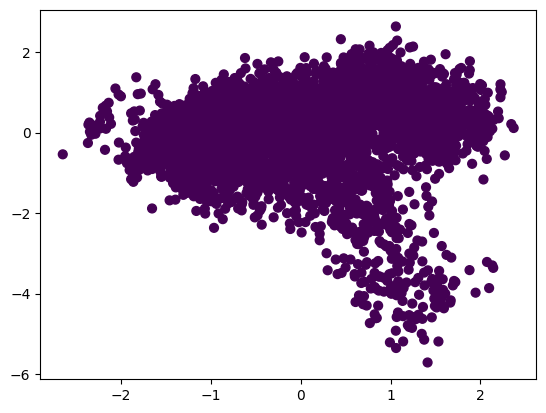

In [9]:
saratry = GaussianMixture(n_components=  1, max_iter = 200, covariance_type='spherical',n_init =3)
saratry.fit(featuresSara)
labels = saratry.predict(featuresSara)

saratry = GaussianMixture(n_components=  1, max_iter = 200, covariance_type='spherical',n_init =3)
saratry.fit(featuresRawan)
labelsR = saratry.predict(featuresRawan)

plt.scatter(featuresRawan[:, 0], featuresRawan[:, 1], c=labelsR, s=40, cmap='viridis')
imagename = './static/'+ 'sara' + '.png'
plt.savefig(imagename)

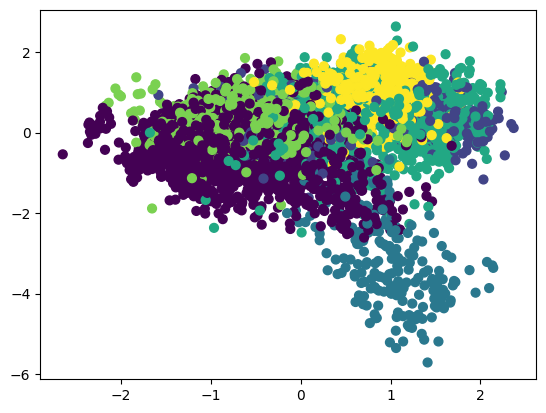

In [4]:
# saratry = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='spherical',n_init =3)
# saratry.fit(featuresSara)
plt.scatter(featuresRawan[:, 0], featuresRawan[:, 1], c=labelsRawan, s=40, cmap='viridis')
imagename = './static/'+ 'sara' + '.png'
plt.savefig(imagename)

In [40]:
testS = extract_features('GMM Data\sara\Sara_open_new (7).wav')
testM = extract_features('GMM Data\salah\Mohamed_open_new (11).wav')
testF = extract_features('GMM Data/rawan/Rawan_open_new (2).wav')

# print(testF)
x = testM

scores_1 = np.array(sara_gmm.score(x))
scores_2 = np.array(salah_gmm.score(x))
scores_3 = np.array(rawan_gmm.score(x))

print("sara {}",scores_1)
print("salah {}",scores_2)
print("fekry {}",scores_3)


sara {} -43.46108875437426
salah {} -37.20524650005552
fekry {} -42.685751101739854


In [41]:
lstFolders = ['Sara', 'Rawan', 'Salah']
models = [joblib.load(f + '.gmm') for f in lstFolders]

In [42]:
y = []
y_true = []
lstFolders = ['sara', 'rawan', 'salah']
# GMM Data\rawan
for folder in lstFolders:
    # try:
        lstFiles = glob.glob('GMM Data/{}/*'.format(folder))
        for f in lstFiles:
            # sr,audio = read(f)
            vstack = extract_features(f)
            output = []
            for model in models:
                scores = np.array(model.score(vstack))
                output.append(scores.sum())

            winner = np.argmax(output)
            y_true.append(winner)
            y.append(lstFolders.index(folder))

In [43]:
f1_score(y, y_true, average='micro')

1.0